<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/iris-binary-classification/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [ ]:
# https://www.kaggle.com/api/v1/datasets/download/taweilo/iris-dataset-elarged-with-smote

In [2]:
data = pd.read_csv('/content/iris_synthetic_data.csv')
data

,sepal length,sepal width,petal length,petal width,label
0,5.2,3.8,1.5,0.3,Iris-setosa
1,5.3,4.1,1.5,0.1,Iris-setosa
2,4.8,3.1,1.5,0.2,Iris-setosa
3,5.2,3.7,1.5,0.2,Iris-setosa
4,4.9,3.0,1.5,0.3,Iris-setosa
...,...,...,...,...,...
2995,7.2,3.6,6.0,2.5,Iris-virginica
2996,7.3,3.0,6.2,2.1,Iris-virginica
2997,6.9,3.2,5.7,2.3,Iris-virginica
2998,7.5,2.8,6.0,2.0,Iris-virginica


In [3]:
data['label'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
new_data = data[data['label'] != 'Iris-virginica']

In [5]:
new_data

,sepal length,sepal width,petal length,petal width,label
0,5.2,3.8,1.5,0.3,Iris-setosa
1,5.3,4.1,1.5,0.1,Iris-setosa
2,4.8,3.1,1.5,0.2,Iris-setosa
3,5.2,3.7,1.5,0.2,Iris-setosa
4,4.9,3.0,1.5,0.3,Iris-setosa
...,...,...,...,...,...
1995,5.2,2.7,3.9,1.4,Iris-versicolor
1996,5.8,2.8,4.5,1.4,Iris-versicolor
1997,5.9,3.2,4.8,1.7,Iris-versicolor
1998,5.9,3.1,4.3,1.5,Iris-versicolor


In [6]:
new_data['label'].unique()

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [7]:
le = LabelEncoder()
labeled_data = le.fit_transform(new_data['label'])

In [8]:
print(labeled_data.shape)

(2000,)


In [9]:
new_data['Target']=labeled_data
new_data

/tmp/ipython-input-2139784781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Target']=labeled_data


,sepal length,sepal width,petal length,petal width,label,Target
0,5.2,3.8,1.5,0.3,Iris-setosa,0
1,5.3,4.1,1.5,0.1,Iris-setosa,0
2,4.8,3.1,1.5,0.2,Iris-setosa,0
3,5.2,3.7,1.5,0.2,Iris-setosa,0
4,4.9,3.0,1.5,0.3,Iris-setosa,0
...,...,...,...,...,...,...
1995,5.2,2.7,3.9,1.4,Iris-versicolor,1
1996,5.8,2.8,4.5,1.4,Iris-versicolor,1
1997,5.9,3.2,4.8,1.7,Iris-versicolor,1
1998,5.9,3.1,4.3,1.5,Iris-versicolor,1


In [10]:
datas = new_data.drop(columns=['label'], axis=1)
datas

,sepal length,sepal width,petal length,petal width,Target
0,5.2,3.8,1.5,0.3,0
1,5.3,4.1,1.5,0.1,0
2,4.8,3.1,1.5,0.2,0
3,5.2,3.7,1.5,0.2,0
4,4.9,3.0,1.5,0.3,0
...,...,...,...,...,...
1995,5.2,2.7,3.9,1.4,1
1996,5.8,2.8,4.5,1.4,1
1997,5.9,3.2,4.8,1.7,1
1998,5.9,3.1,4.3,1.5,1


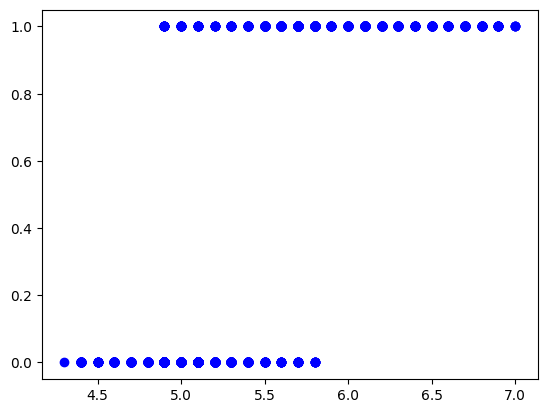

In [11]:
plt.scatter(datas['sepal length'], datas['Target'], c='b')
plt.show()

In [12]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [13]:
# def compute_cost(y,y_pred):
#   y = np.array(y)
#   y_pred = np.array(y_pred)

#   episilon = 1e-15
#   y_pred = np.clip(y_pred, episilon, 1-episilon)
#   cost = -(1 / len(y)) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
#   return cost


def compute_cost(y, y_pred):
    y = np.array(y, dtype=np.float64)
    y_pred = np.array(y_pred, dtype=np.float64)

    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    cost = -(1 / len(y)) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

In [14]:
def gradient_descent(x, y, tmp_w,tmp_b, max_iter=1000, alpha_rate=0.01):
  w = tmp_w
  b = tmp_b
  m = len(x)
  cost_history=[]
  for i in range(max_iter):
    z = np.dot(x, w) + b
    y_pred = sigmoid(z)
    cost = compute_cost(y_pred,y)
    cost_history.append(cost)

    if i % 100 == 0:
      print(f'Iteration {i} cost is {cost}')

    dj_dw = (1 / m) * np.dot(x.T, (y_pred - y))
    dj_db = (1 / m) * np.sum(y_pred - y)

    w = w - (alpha_rate * dj_dw)
    b = b - (alpha_rate * dj_db)

  return w, b, cost_history

In [15]:
def predict(X, w, b, threshold=0.6):
  y_pred_sigmoid = sigmoid(np.dot(w, X.T)+b)
  y_pred = np.zeros(len(y_pred_sigmoid))
  for i in range(len(y_pred_sigmoid)):
    if y_pred_sigmoid[i] >= threshold:
      y_pred[i] = 1
    else:
      y_pred[i] = 0
  return y_pred

In [16]:
def print_metrices(y_pred, y_test):
  print('-----------------------------------------------------')
  print(f'Test accuracy score : {accuracy_score(y_test, y_pred)}')
  print(f'Confusion matrix : {confusion_matrix(y_test, y_pred)}')
  print(f'Precision score : {precision_score(y_test, y_pred)}')
  print(f'Recall score : {recall_score(y_test, y_pred)}')
  print(f'F1 score : {f1_score(y_test, y_pred)}')
  print(f'ROC score : {roc_auc_score(y_test, y_pred)}')
  print('-----------------------------------------------------')

In [17]:
X = new_data.drop(columns=['label'], axis=1)
y = new_data['Target']

In [18]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3)

In [19]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1400, 5)
(1400,)
(600, 5)
(600,)


In [20]:
tmp_w = np.array([2, 5, 1, 0, 3])
tmp_b = 1
print(tmp_w.shape)

(5,)


In [21]:
w,b, cost_history = gradient_descent(X_train, y_train, tmp_w, tmp_b,max_iter=40, alpha_rate=0.1)

Iteration 0 cost is 17.368070415711866


In [22]:
print(w)
print(b)

[-1.79991454  1.82108428  0.83972623  0.21860734  3.38256906]
0.16479908488214112


In [23]:
y_train_pred_sigmoid = sigmoid(np.dot(w, X_train.T)+b)
print(y_train_pred_sigmoid)

[0.77940102 0.95555786 0.87345404 ... 0.39010738 0.15084732 0.17949573]


In [24]:
y_train_pred = np.zeros(len(y_train_pred_sigmoid))
for i in range(len(y_train_pred_sigmoid)):
  if y_train_pred_sigmoid[i] >= 0.6:
    y_train_pred[i] = 1
  else:
    y_train_pred[i] = 0

In [25]:
y_train_pred

array([1., 1., 1., ..., 0., 0., 0.])

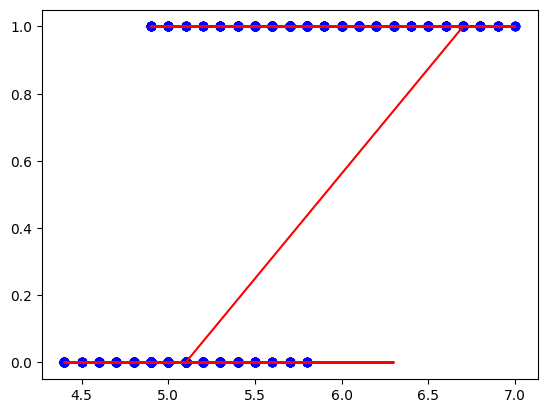

In [26]:
sorted_indexes = y_train_pred.argsort()
X_sorted = X_train.iloc[sorted_indexes]
y_sorted = y_train.iloc[sorted_indexes]
y_test_sorted = pd.Series(y_train_pred)[sorted_indexes]

plt.scatter(X_sorted['sepal length'], y_sorted, c='b')
plt.plot(X_sorted['sepal length'],y_test_sorted, c='r')
plt.show()

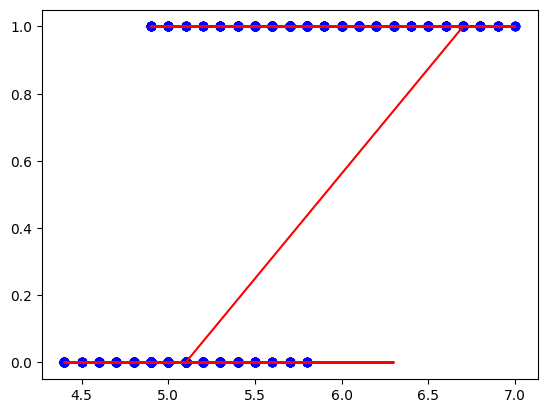

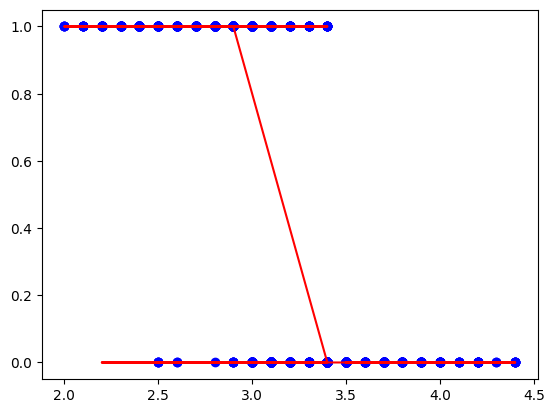

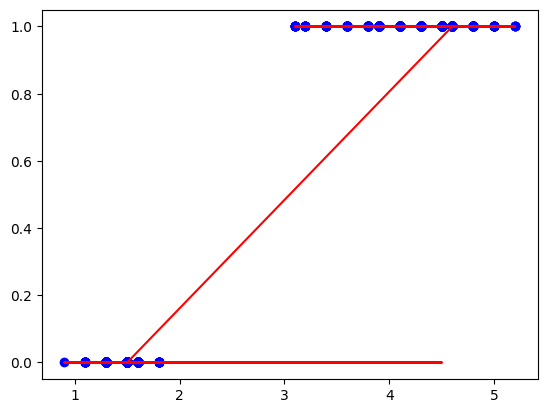

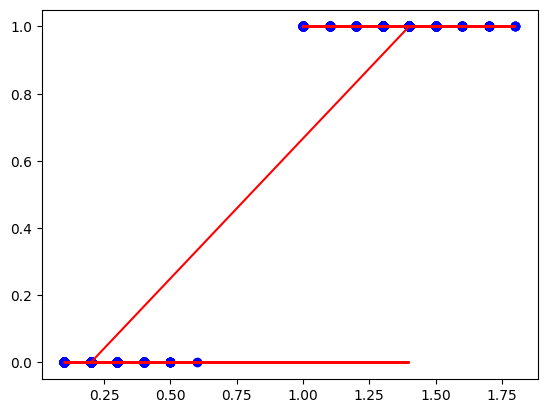

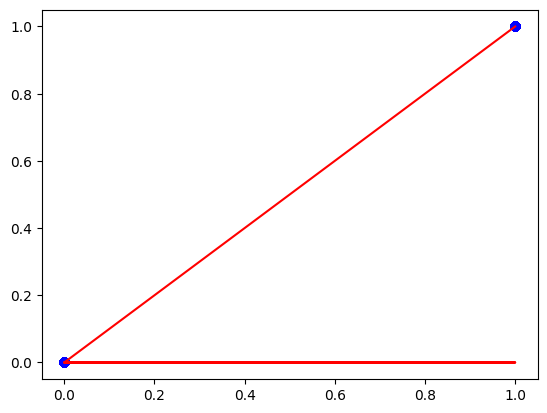

In [27]:
for i in X_train.columns:
  sorted_indexes = y_train_pred.argsort()
  X_sorted = X_train.iloc[sorted_indexes]
  y_sorted = y_train.iloc[sorted_indexes]
  y_test_sorted = pd.Series(y_train_pred)[sorted_indexes]

  plt.scatter(X_sorted[i], y_sorted, c='b')
  plt.plot(X_sorted[i],y_test_sorted, c='r')
  plt.show()

In [28]:
confusion_matrix(y_train, y_train_pred)

array([[704,   0],
       [ 11, 685]])

In [29]:
accuracy_score(y_train, y_train_pred)

0.9921428571428571

In [30]:
y_test_pred_sigmoid = sigmoid(np.dot(w, X_test.T)+b)
print(y_test_pred_sigmoid)

[0.88535506 0.27165296 0.32411804 0.29165642 0.12897195 0.82287634
 0.84476196 0.77940102 0.24831945 0.15084732 0.77173259 0.24831945
 0.94458663 0.15057635 0.80692071 0.24012898 0.20859334 0.82287634
 0.31476379 0.20859334 0.80846296 0.86425755 0.12897195 0.17918416
 0.20754686 0.15084732 0.23870639 0.15084732 0.20859334 0.75213942
 0.87101793 0.29165642 0.20789525 0.17949573 0.21867173 0.8826559
 0.21482974 0.3311192  0.31659306 0.85396223 0.23793783 0.78144562
 0.12897195 0.6573249  0.31476379 0.83480135 0.2172284  0.79796006
 0.35806178 0.80122886 0.82664767 0.80468752 0.21010935 0.74951115
 0.20859334 0.82573569 0.25429934 0.17949573 0.17949573 0.33992243
 0.15449672 0.75319964 0.80188408 0.737953   0.24012898 0.74951115
 0.78783217 0.95425195 0.90200265 0.20883468 0.77940102 0.27899249
 0.27899249 0.27209341 0.88853045 0.9100048  0.26473419 0.92594563
 0.77135945 0.24309102 0.24012898 0.56405127 0.23793783 0.85396223
 0.25429934 0.15084732 0.81782989 0.78783217 0.79964279 0.93583

In [31]:
y_test_pred = np.zeros(len(y_test_pred_sigmoid))
for i in range(len(y_test_pred_sigmoid)):
  if y_test_pred_sigmoid[i] >= 0.6:
    y_test_pred[i] = 1
  else:
    y_test_pred[i] = 0

In [32]:
y_test_pred

array([1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1.

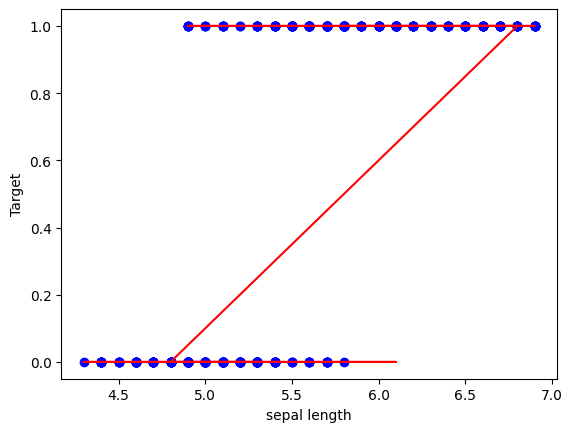

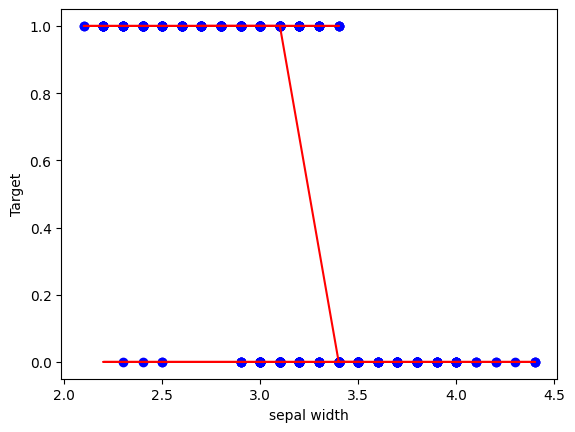

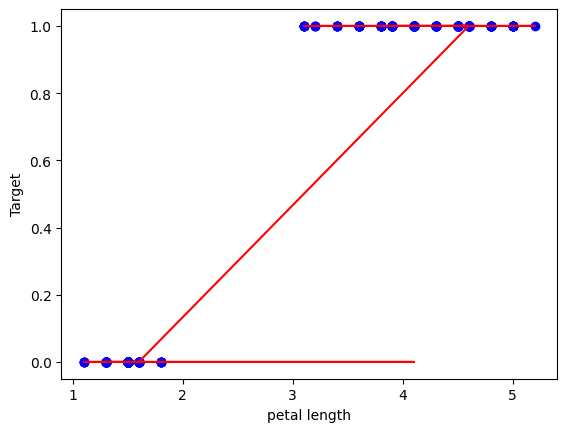

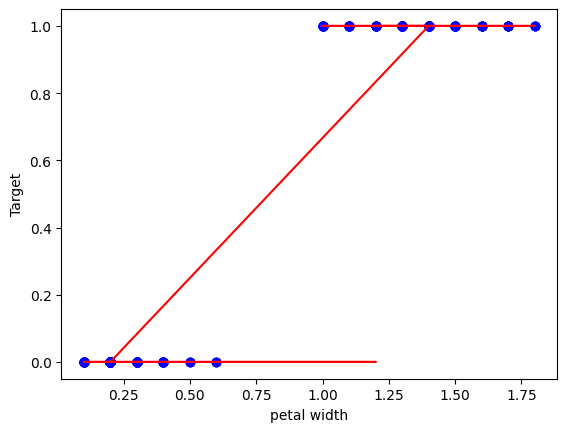

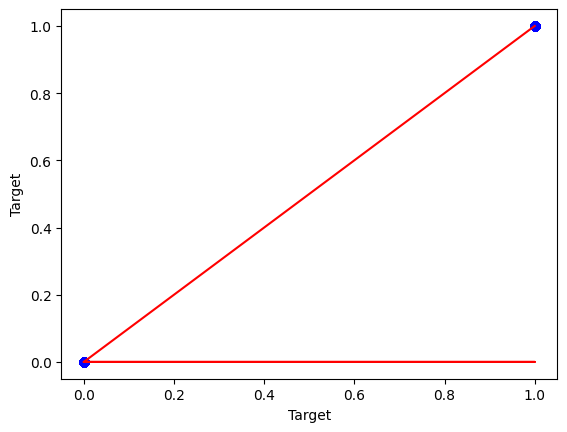

In [33]:
for i in X_test.columns:
  sorted_indexes = y_test_pred.argsort()
  X_sorted = X_test.iloc[sorted_indexes]
  y_sorted = y_test.iloc[sorted_indexes]
  y_test_sorted = pd.Series(y_test_pred)[sorted_indexes]

  plt.scatter(X_sorted[i], y_sorted, c='b')
  plt.plot(X_sorted[i],y_test_sorted, c='r')
  plt.xlabel(i)
  plt.ylabel('Target')
  plt.show()

In [34]:
print(f'Test accuracy score : {accuracy_score(y_test, y_test_pred)}')
print(f'Confusion matrix : {confusion_matrix(y_test, y_test_pred)}')
print(f'Precision score : {precision_score(y_test, y_test_pred)}')
print(f'Recall score : {recall_score(y_test, y_test_pred)}')
print(f'F1 score : {f1_score(y_test, y_test_pred)}')
print(f'ROC score : {roc_auc_score(y_test, y_test_pred)}')

Test accuracy score : 0.9916666666666667
Confusion matrix : [[296   0]
 [  5 299]]
Precision score : 1.0
Recall score : 0.9835526315789473
F1 score : 0.9917081260364843
ROC score : 0.9917763157894737


In [35]:
kf = KFold(n_splits = 10, shuffle=True, random_state=42)

In [36]:
def k_fold_validation(splits):
  kf = KFold(n_splits = splits, shuffle=True, random_state=42)
  splited_data = kf.split(X=X)
  accuracies = []
  for train_index, test_index in splited_data:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    w, b, cost_history = gradient_descent(X_train, y_train, tmp_w, tmp_b, 40, 0.1)
    y_pred = predict(X_test, w, b)
    print_metrices(y_pred, y_test)

    accuracies.append(accuracy_score(y_test, y_pred))
    return accuracies

In [37]:
kf_accuracies = k_fold_validation(10)
print(kf_accuracies)

Iteration 0 cost is 17.28857640654567
-----------------------------------------------------
Test accuracy score : 0.99
Confusion matrix : [[99  0]
 [ 2 99]]
Precision score : 1.0
Recall score : 0.9801980198019802
F1 score : 0.99
ROC score : 0.9900990099009901
-----------------------------------------------------
[0.99]


In [38]:
def stratified_k_fold_validation(splits):
  kf = StratifiedKFold(n_splits = splits, shuffle=True, random_state=42)
  splited_data = kf.split(X=X, y=y)
  accuracies = []
  for train_index, test_index in splited_data:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    w, b, cost_history = gradient_descent(X_train, y_train, tmp_w, tmp_b, 40, 0.1)
    y_pred = predict(X_test, w, b)
    print_metrices(y_pred, y_test)

    accuracies.append(accuracy_score(y_test, y_pred))
    return accuracies

In [39]:
stratifiedKFold_accuracies = stratified_k_fold_validation(10)

Iteration 0 cost is 17.269388197438094
-----------------------------------------------------
Test accuracy score : 0.99
Confusion matrix : [[100   0]
 [  2  98]]
Precision score : 1.0
Recall score : 0.98
F1 score : 0.98989898989899
ROC score : 0.99
-----------------------------------------------------


In [41]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_train_pred = lr.predict(X_train)
y_train_pred

array([1, 1, 1, ..., 0, 0, 0])

In [45]:
accuracy_score(y_train, y_train_pred)

1.0

In [46]:
y_test_pred = lr.predict(X_test)
y_test_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,

In [47]:
accuracy_score(y_test, y_test_pred)

1.0